In [1]:
from sklearn.cluster import KMeans
import random
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [2]:
X, y_true = make_blobs(n_samples=300, centers=3,
                       cluster_std=1.1, random_state=0)
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [3]:
def ordered_voronoi_diagram(X,landmark_points,order):
    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    # Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = []
    for i in range(len(xx)):
        row_labels = []
        for j in range(len(xx[0])):
            distances = []
            for q in landmark_points:
                distances.append(math.dist((xx[i,j],yy[i,j]), q))

            my_indices = np.argsort(distances)

            label = 0;
            for k in range(order):
                label = 10*label + my_indices[k]

            row_labels.append(label)
        Z.append(row_labels)
        
    Z = np.array(Z)
        
    values = list(set(list(Z.ravel())))
    new_values = range(len(values))
    
    res = {values[i]: new_values[i] for i in range(len(values))}
    for i in range(len(Z)):
        for j in range(len(Z[0])):
            Z[i,j] = res[Z[i,j]]
    

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6), dpi=80)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap='tab20c',
           aspect='auto', origin='lower')

    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    # Plot the centroids as a white X
    centroids = landmark_points
    plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

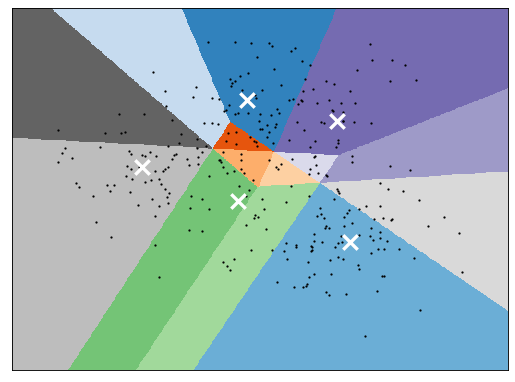

In [4]:
ordered_voronoi_diagram(X,kmeans.cluster_centers_,2)